In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

**Generating a pandas dataframe from the source .csv file**

In [8]:
# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load csv file and generate pandas dataframe
input_csv = r'..\data\clean\after_step_3b_outliers_cat.csv' # Fill your path to file
df_1 = pd.read_csv(input_csv, sep = ',')

df_1.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,Installed,4,To renovate,0,F,767.0,2552.000000,415.906128,East Flanders,NaN,True,1,0,0
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1050.0,1796.401198,285.713333,East Flanders,NaN,True,1,2,2
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,120.0,1785.714286,2291.666667,Antwerp,NaN,True,2,0,1
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,Installed,3,To renovate,0,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,True,1,0,0
4,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,0,1,1,36,374,Installed,3,As new,0,C,374.0,2553.571429,1911.764706,Brabant_Wallon,NaN,True,1,4,3


### Approach
#### Numerical data:

*Determine if two numerical datasets have a linear correlation.*
1. Pearson coefficient:
- A Pearson coefficient close to 1 (or -1) indicates a strong positive (or negative) linear relationship.
- A Pearson coefficient close to 0 indicates little to no linear relationship.
2. Scatter plots

*If non-linear: Spearman’s Correlation for non-linear correlation of data*
non-parametric measure of monotonic relationships (relationships that are either consistently increasing or decreasing, but not necessarily in a straight line).
- Spearman's ρ can take values from -1 to 1:
- 1: A perfect increasing monotonic relationship.
- -1: A perfect decreasing monotonic relationship.
- 0: No monotonic relationship.

*When to Use Spearman’s Rank Correlation:*
-Non-linear relationships: When you suspect the relationship between variables is monotonic but not linear.
-Ordinal data: When your data is not continuous or normally distributed (e.g., ranks, ordered categories).
-Robust to outliers: Spearman’s correlation is less sensitive to outliers because it uses rank values rather than actual data values.
*Steps for Calculating Spearman’s Correlation:*
-Rank the data: Replace the actual data values with their respective ranks.
-Calculate the differences in ranks: Compute the difference between the ranks of corresponding values from the two variables.
-Apply the Spearman’s correlation formula.

#### Categorical data:
*Spearman’s Correlation for non-linear correlation of data*

#### Boolean data:
*Point-Biserial Correlation:* Best for testing linear relationships between a binary and numerical dataset.

*Spearman’s Rank Correlation:* Use when you suspect a non-linear but monotonic relationship.

**Numerical data - linearity via Pearson and scatter plots**

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5021 non-null   int64  
 1   locality_name              5021 non-null   object 
 2   Postal_code                5021 non-null   int64  
 3   Price                      5021 non-null   int64  
 4   Subtype                    5021 non-null   object 
 5   Number_of_bedrooms         5021 non-null   int64  
 6   Living_area                5021 non-null   int64  
 7   street                     5021 non-null   object 
 8   number                     5005 non-null   object 
 9   latitude                   5021 non-null   float64
 10  longitude                  5021 non-null   float64
 11  Open_fire                  5021 non-null   int64  
 12  Swimming_Pool              5021 non-null   int64  
 13  hasTerrace                 5021 non-null   int64

In [10]:
# transform 'int64' to 'Int64' to handle NaN

int_columns = df_1.select_dtypes(include=['int64'])

for col in int_columns.columns:
    df_1[col] = df_1[col].astype('Int64')
    
# transform dtypes 'object' to 'category'
obj_columns = df_1.select_dtypes(include=['object'])

for col in obj_columns.columns:
    df_1[col] = df_1[col].astype('category')

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         5021 non-null   Int64   
 1   locality_name              5021 non-null   category
 2   Postal_code                5021 non-null   Int64   
 3   Price                      5021 non-null   Int64   
 4   Subtype                    5021 non-null   category
 5   Number_of_bedrooms         5021 non-null   Int64   
 6   Living_area                5021 non-null   Int64   
 7   street                     5021 non-null   category
 8   number                     5005 non-null   category
 9   latitude                   5021 non-null   float64 
 10  longitude                  5021 non-null   float64 
 11  Open_fire                  5021 non-null   Int64   
 12  Swimming_Pool              5021 non-null   Int64   
 13  hasTerrace                 5021 n

In [11]:
df_1['Postal_code'] = df_1['Postal_code'].astype('category')

df_1['Open_fire'] = df_1['Open_fire'].astype('bool')
df_1['Swimming_Pool'] = df_1['Swimming_Pool'].astype('bool')
df_1['hasTerrace'] = df_1['hasTerrace'].astype('bool')
df_1['Furnished'] = df_1['Furnished'].astype('bool')

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         5021 non-null   Int64   
 1   locality_name              5021 non-null   category
 2   Postal_code                5021 non-null   category
 3   Price                      5021 non-null   Int64   
 4   Subtype                    5021 non-null   category
 5   Number_of_bedrooms         5021 non-null   Int64   
 6   Living_area                5021 non-null   Int64   
 7   street                     5021 non-null   category
 8   number                     5005 non-null   category
 9   latitude                   5021 non-null   float64 
 10  longitude                  5021 non-null   float64 
 11  Open_fire                  5021 non-null   bool    
 12  Swimming_Pool              5021 non-null   bool    
 13  hasTerrace                 5021 n

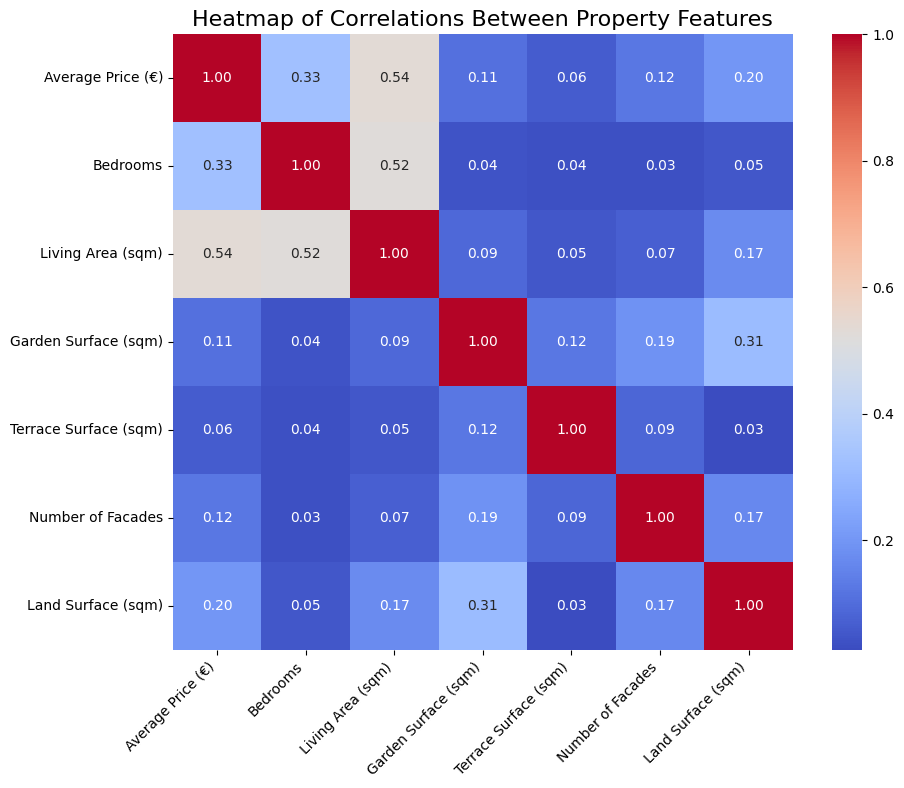

In [12]:
# Step 1: Select interesting columns
corr_df = df_1[['Price', 'Number_of_bedrooms', 'Living_area', 'gardenSurface', 'terraceSurface', 'Number_of_facades', 'landSurface']]

# Step 2: Rename columns for better display
corr_df = corr_df.rename(columns={
    'Price': 'Average Price (€)',
    'Number_of_bedrooms': 'Bedrooms',
    'Living_area': 'Living Area (sqm)',
    'gardenSurface': 'Garden Surface (sqm)',
    'terraceSurface': 'Terrace Surface (sqm)',
    'Number_of_facades': 'Number of Facades',
    'landSurface': 'Land Surface (sqm)'
})

# Step 3: Calculate correlations
corr_matrix = corr_df.corr()

# Step 4: Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Customize the title and labels
plt.title('Heatmap of Correlations Between Property Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


*Checking linearity between numerical and encoded categorical

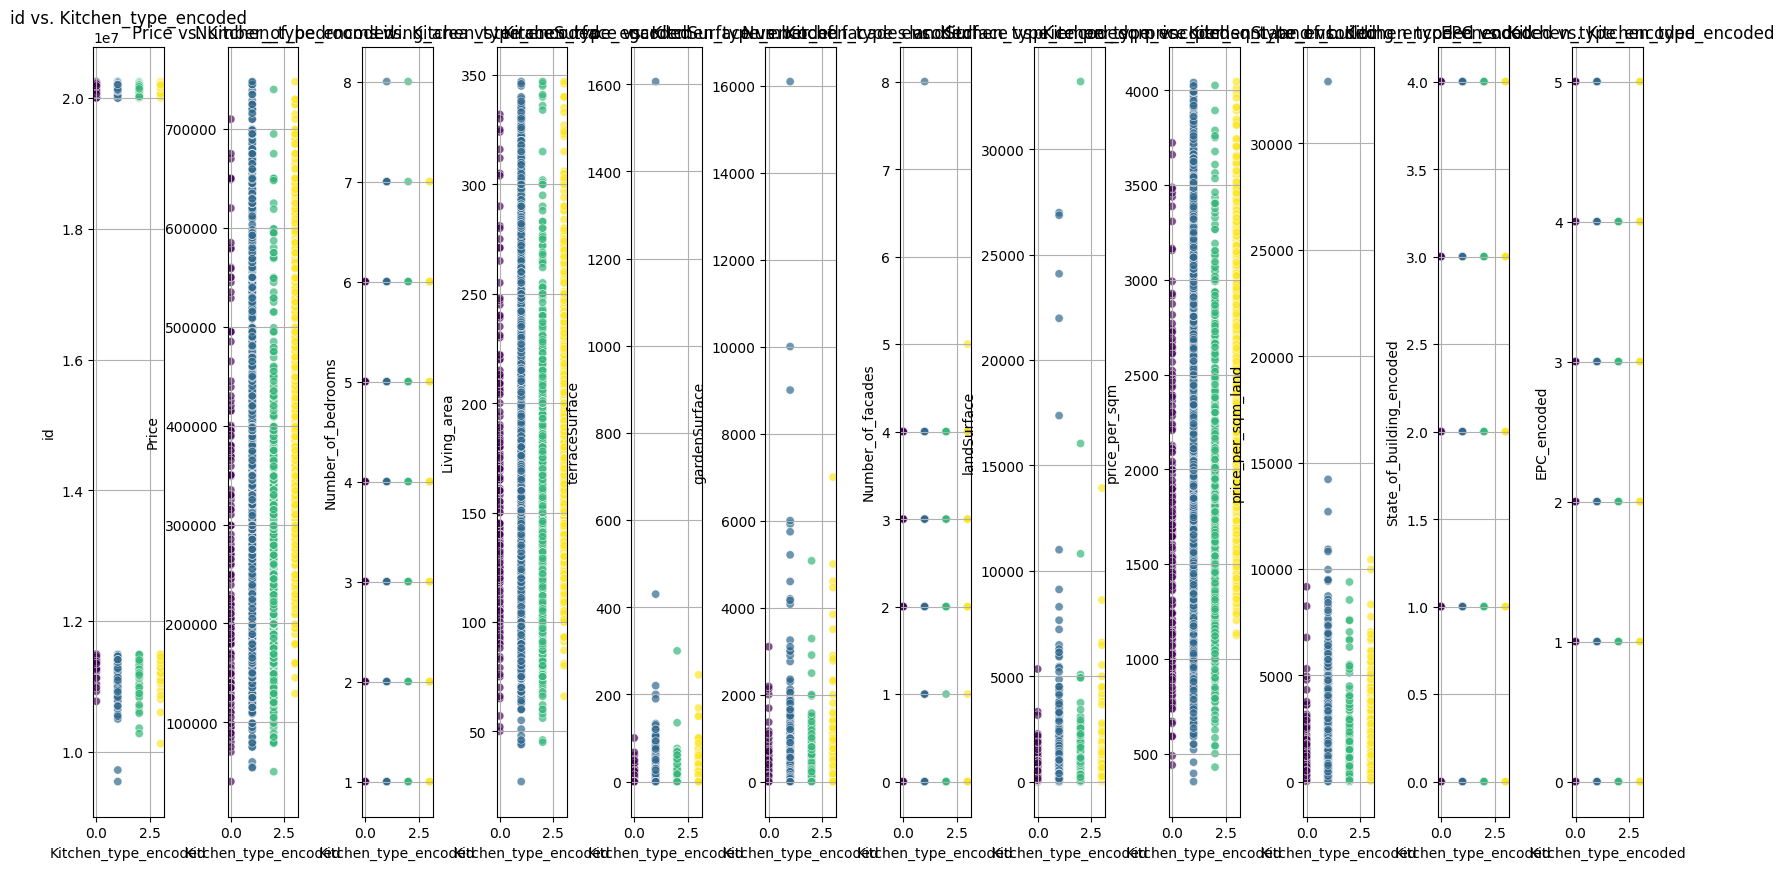

In [118]:
# encoded_columns = ['Kitchen_type_encoded']

# # List of numerical columns
# numerical_columns = df_1.select_dtypes(include=['Int64', 'float64']).columns.tolist()

# # Remove the encoded columns from the numerical list to avoid plotting against themselves
# numerical_columns = [col for col in numerical_columns if col not in encoded_columns]

# # Exclude latitude and longitude from the numerical columns
# numerical_columns = [col for col in numerical_columns if col not in ['latitude', 'longitude']]

# # Set up the plots
# num_encoded_columns = len(encoded_columns)
# num_numerical_columns = len(numerical_columns)

# # Create a grid of scatter plots
# plt.figure(figsize=(20, 10 * num_encoded_columns))

# for i, encoded_col in enumerate(encoded_columns):
#     for j, num_col in enumerate(numerical_columns):
#         plt.subplot(num_encoded_columns, num_numerical_columns, i * num_numerical_columns + j + 1)
#         scatter = sns.scatterplot(x=df_1[encoded_col], y=df_1[num_col], hue=df_1['Kitchen_type_encoded'], palette='viridis', alpha=0.7, legend = False)
#         plt.title(f'{num_col} vs. {encoded_col}')
#         plt.xlabel(encoded_col)
#         plt.ylabel(num_col)
#         plt.grid(True)


# plt.subplots_adjust(hspace=0.9, wspace=0.9)
# plt.show()

Pearson correlation coefficients:
                                 id     Price  Number_of_bedrooms  \
id                         1.000000  0.053072           -0.006077   
Price                      0.053072  1.000000            0.325052   
Number_of_bedrooms        -0.006077  0.325052            1.000000   
Living_area               -0.009715  0.535161            0.520726   
latitude                   0.079777  0.212106           -0.005209   
longitude                 -0.070096 -0.000980           -0.007401   
terraceSurface            -0.016129  0.061826            0.036924   
gardenSurface             -0.038276  0.107278            0.044841   
Number_of_facades         -0.058736  0.122005            0.034073   
landSurface               -0.010258  0.200399            0.052779   
price_per_sqm              0.067565  0.621168           -0.099773   
price_per_sqm_land         0.033506  0.104772           -0.004028   
Kitchen_type_encoded       0.029186  0.166243            0.000013   


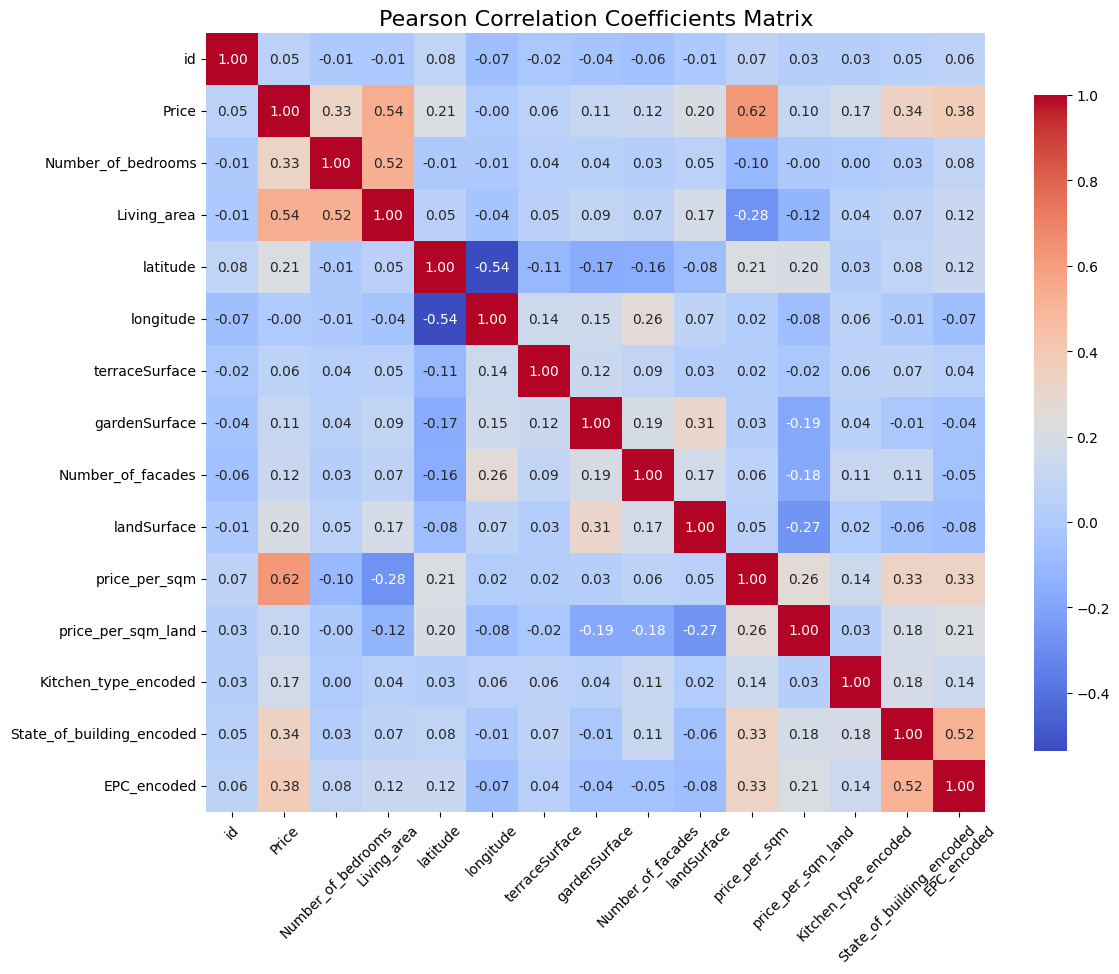

In [17]:

# Select numerical variables
numerical_columns = df_1.select_dtypes(include=['Int64', 'float64']).columns.tolist()

# Calculate Pearson correlation coefficient only for numerical variables
pearson_correlation = df_1[numerical_columns].corr(method='pearson')

# Display the Pearson correlation coefficients table
print("Pearson correlation coefficients:")
print(pearson_correlation)

# Set up the plot
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Pearson Correlation Coefficients Matrix', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Y-axis labels horizontal
plt.tight_layout()       # Automatically adjust layout
plt.show()


**Saving data to a new .csv file and a .pkl file**

In [119]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_4_correlation.csv'  # Fill your path to file
df_1.to_csv(output_csv, index=False)


# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_4_correlation.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(df_1, f)
